In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\vamsv\Downloads\archive (10)\chinese_mnist.csv")
df

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九
...,...,...,...,...,...
14995,99,5,9,8,八
14996,99,6,9,8,八
14997,99,7,9,8,八
14998,99,8,9,8,八


In [3]:
import cv2
filename = df[['suite_id', 'sample_id', 'code']].values

images = [ cv2.imread(rf"C:\Users\vamsv\Downloads\archive (10)\data\data\input_{suite_id}_{sample_id}_{code}.jpg") for suite_id, sample_id, code in filename ]
labels = [ [x - 1] for x in df['code'].values ] # need to compensate to 0-15 "C:\Users\vamsv\Downloads\archive (10)\data\data\input_100_10_12.jpg"

In [10]:
y=pd.get_dummies(pd.DataFrame(labels),columns=[0])

In [8]:
import numpy as np
images=np.array(images)
images.shape

(15000, 64, 64, 3)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images,y,shuffle=True)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11250, 64, 64, 3), (3750, 64, 64, 3), (11250, 15), (3750, 15))

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout,Conv2D,MaxPooling2D
from keras.activations import relu
from keras.losses import categorical_crossentropy
from keras.optimizers import adam


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [34]:
his=model.fit(X_train,y_train,epochs=5,validation_split=0.2)#,callbacks=[es])

Epoch 1/5
282/282 [==============================] - 19s 64ms/step - loss: 1.6853 - accuracy: 0.6681 - val_loss: 0.4653 - val_accuracy: 0.8542
Epoch 2/5
282/282 [==============================] - 19s 66ms/step - loss: 0.2537 - accuracy: 0.9194 - val_loss: 0.3239 - val_accuracy: 0.8951
Epoch 3/5
282/282 [==============================] - 19s 66ms/step - loss: 0.1100 - accuracy: 0.9628 - val_loss: 0.3234 - val_accuracy: 0.9124
Epoch 4/5
282/282 [==============================] - 19s 67ms/step - loss: 0.0819 - accuracy: 0.9743 - val_loss: 0.2840 - val_accuracy: 0.9222
Epoch 5/5
282/282 [==============================] - 19s 66ms/step - loss: 0.0575 - accuracy: 0.9817 - val_loss: 0.2652 - val_accuracy: 0.9298


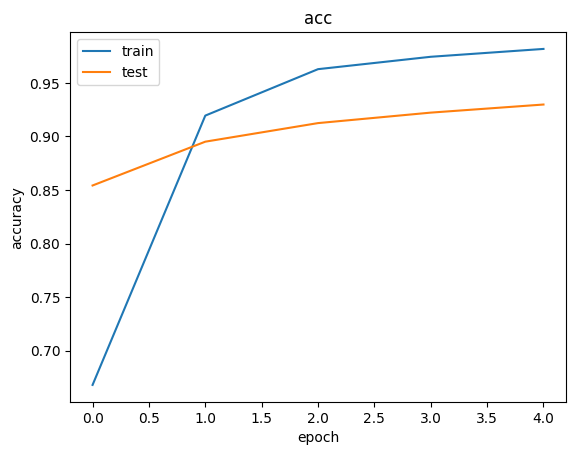

In [35]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title("acc")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

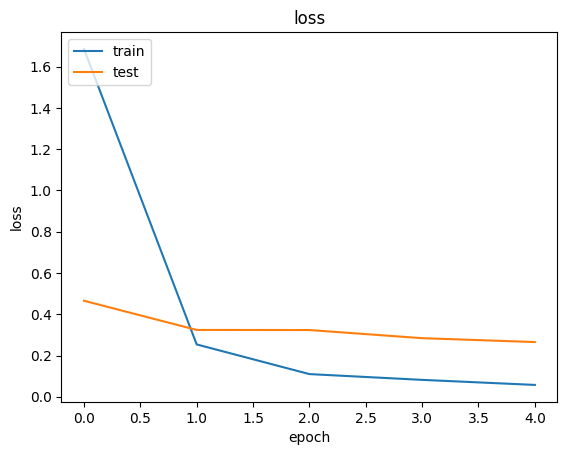

In [36]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title("loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
loss, acc=model.evaluate(X_test,y_test)
loss, acc

118/118 [==============================] - 2s 14ms/step - loss: 0.2639 - accuracy: 0.9336


(0.26394352316856384, 0.9336000084877014)